In [1]:
import numpy as np 
from os import listdir
from os.path import isfile, join
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import cvxEDA
import datetime
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

import pylab as pl
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from sklearn.preprocessing import normalize
sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
path1 = 'data/group1'
path2 = 'data/group2'
# frequency = df.iloc[1].values
filenames = [join(path1,f) for f in listdir(path1) if isfile(join(path1
                                                                  , f))]
filenames

['data/group1/EDA2.csv',
 'data/group1/EDA1.csv',
 'data/group1/EDA5.csv',
 'data/group1/EDA6.csv',
 'data/group1/EDA4.csv',
 'data/group1/EDA3.csv']

In [3]:
def file_names(path):
    filenames = [join(path,f) for f in listdir(path) if isfile(join(path, f))]
    return filenames

In [4]:
def import_data(filename,quant=False):
    df = pd.read_csv(filename , header= None)
    df.columns = ['eda']
    frequency = df.iloc[1].values
    df_init_time = datetime.datetime(2018, np.random.choice(range(3,5),1), 
                                     np.random.choice(range(1,30),1), 
                                     7, 0,0).strftime('%Y-%m-%d %H:%M:%S')
    time_series = pd.date_range(start=df_init_time, periods=len(df), 
                          freq=str(1/int(frequency))+'S')
    df = df.set_index(time_series, drop =True)
    df = df[3:]
    df= df.between_time('7:00', '9:00')
    df['eda_norm'] = (df.eda - df.eda.min()) / (df.eda.max() - df.eda.min())
    def quantile(df,quant):
        
        mean = []
        eda_mean = np.mean(df.eda_norm)
        eda_quan = df.eda_norm.quantile(quant)
        count = sum(i > eda_quan for i in df.eda_norm)
        max_scr = max(df.eda_norm)
        plt.figure(figsize=(15,6))
        plt.plot(df['eda_norm'],color ='mediumaquamarine')
        plt.axhline(y = eda_mean, color = 'lightsalmon', linestyle = '--')
        plt.axhline(y = eda_quan, color = 'coral', linestyle = '--')
        return count,mean,max_scr

    if quant:
        return (df,quantile(df,quant))
    else:
        return df
    


In [6]:
# def anova(df):

In [ ]:
(df1_1,count1_1,mean1_1,max_scr1_1),(df1_2,count1_2,mean1_2,max_scr1_2),(df1_3,count1_3,mean1_3,max_scr1_3),\
(df1_4,count1_4,mean1_4,max_scr1_4),(df1_5,count1_5,mean1_5,max_scr1_5),\
(df1_6,count1_6,mean1_6,max_scr1_6) = [import_data(filepath,0.75) 
                                                    for filepath in file_names(path1)]
(df2_1,count2_1,mean2

,eda,eda_norm
2018-03-27 07:00:00.750,0.026905,0.016265
2018-03-27 07:00:01.000,0.060215,0.044456
2018-03-27 07:00:01.250,0.060215,0.044456
2018-03-27 07:00:01.500,0.061496,0.045540
2018-03-27 07:00:01.750,0.062778,0.046625


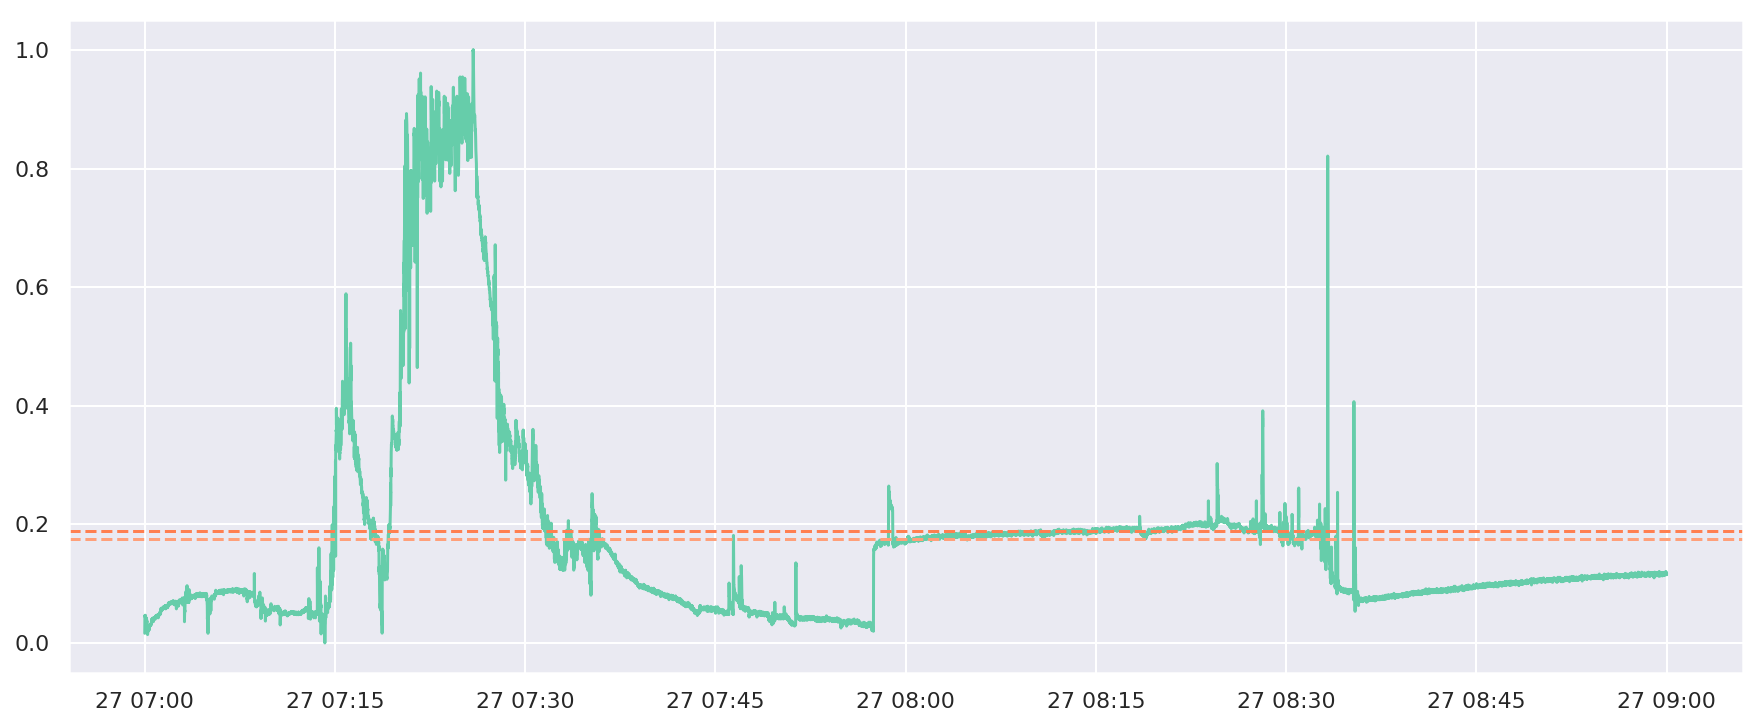

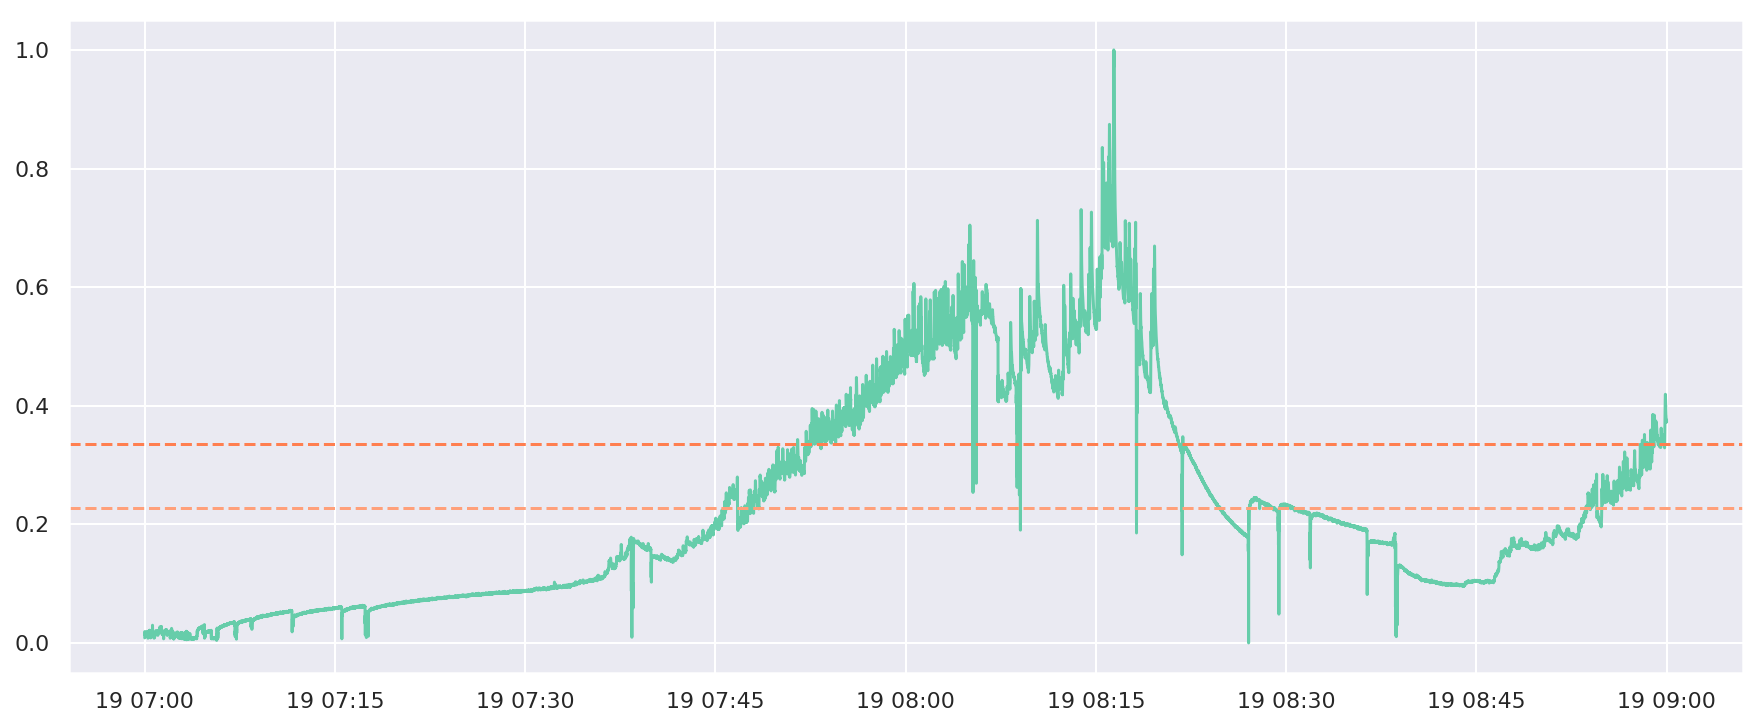

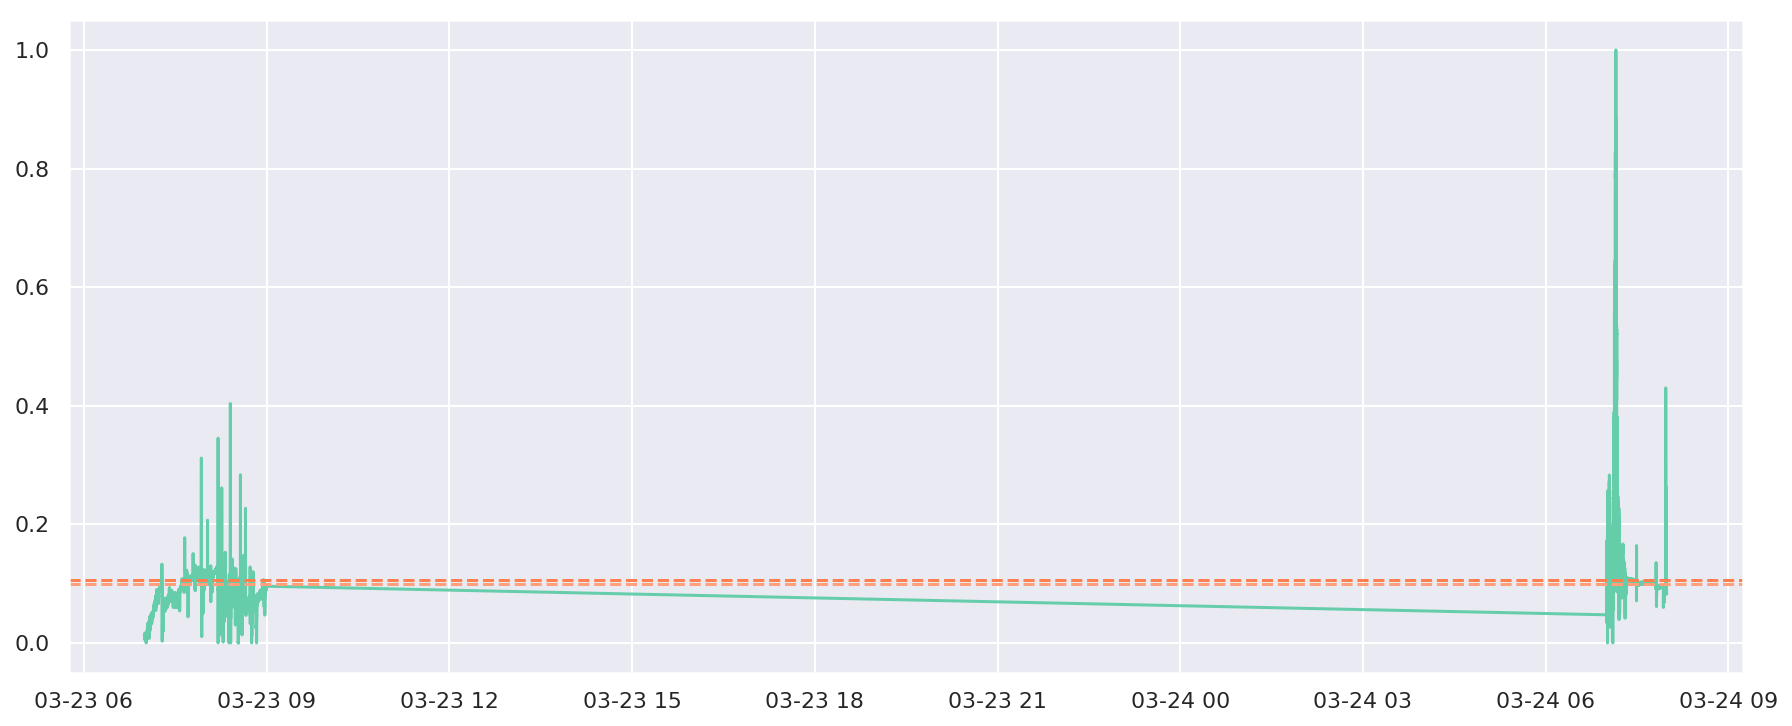

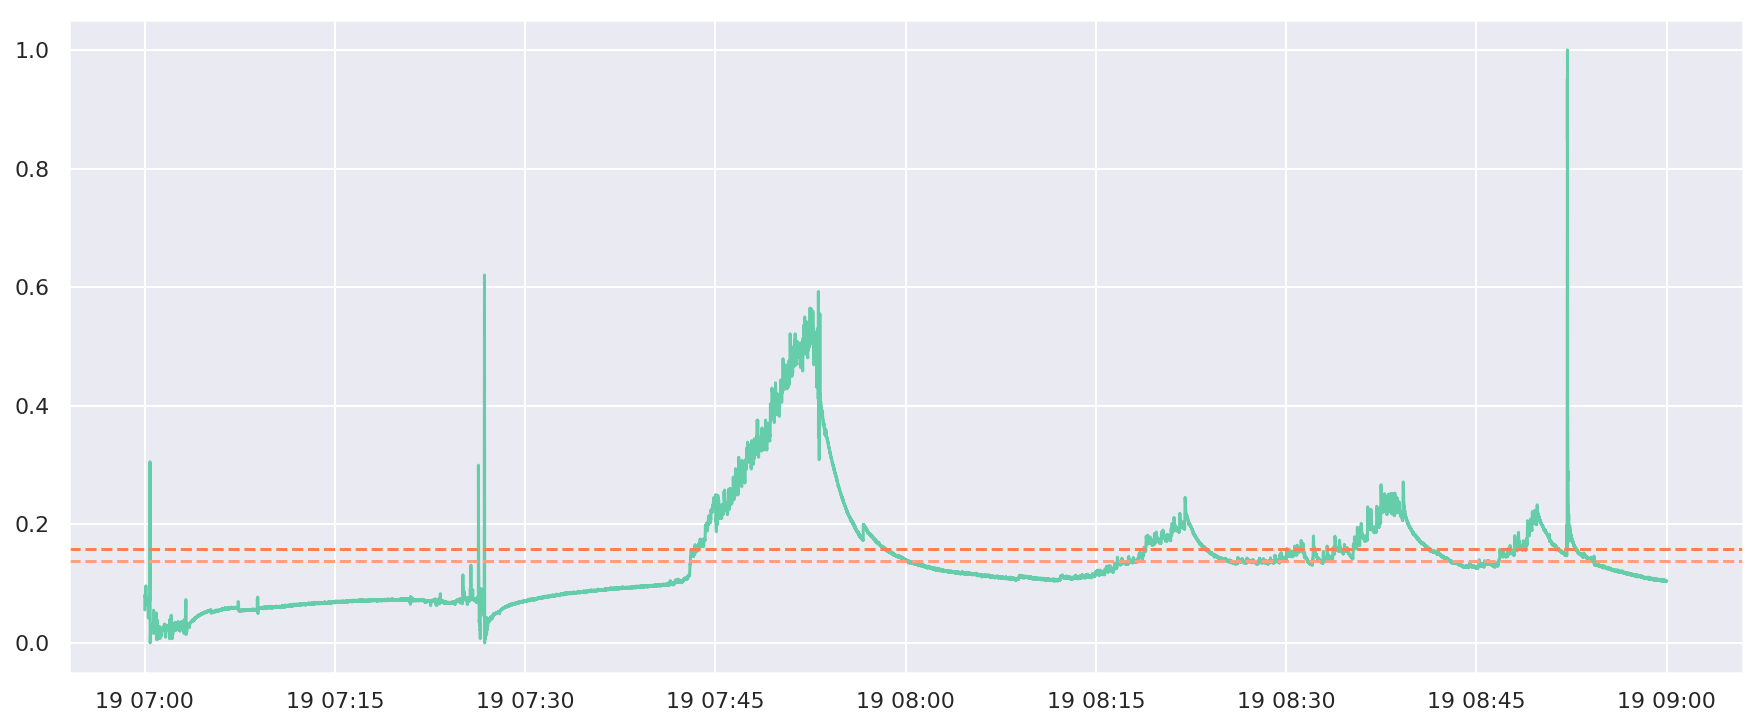

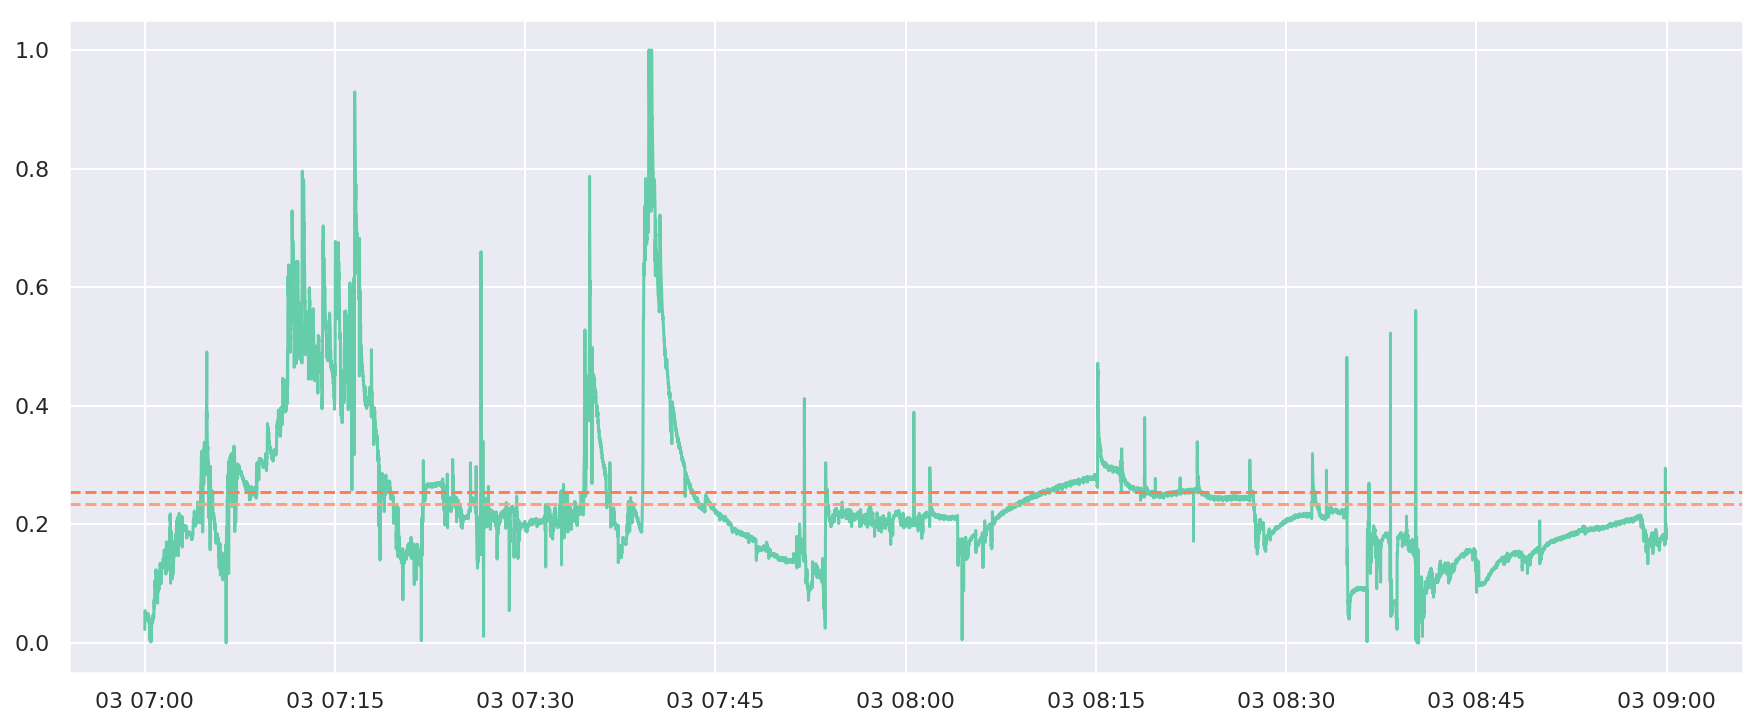

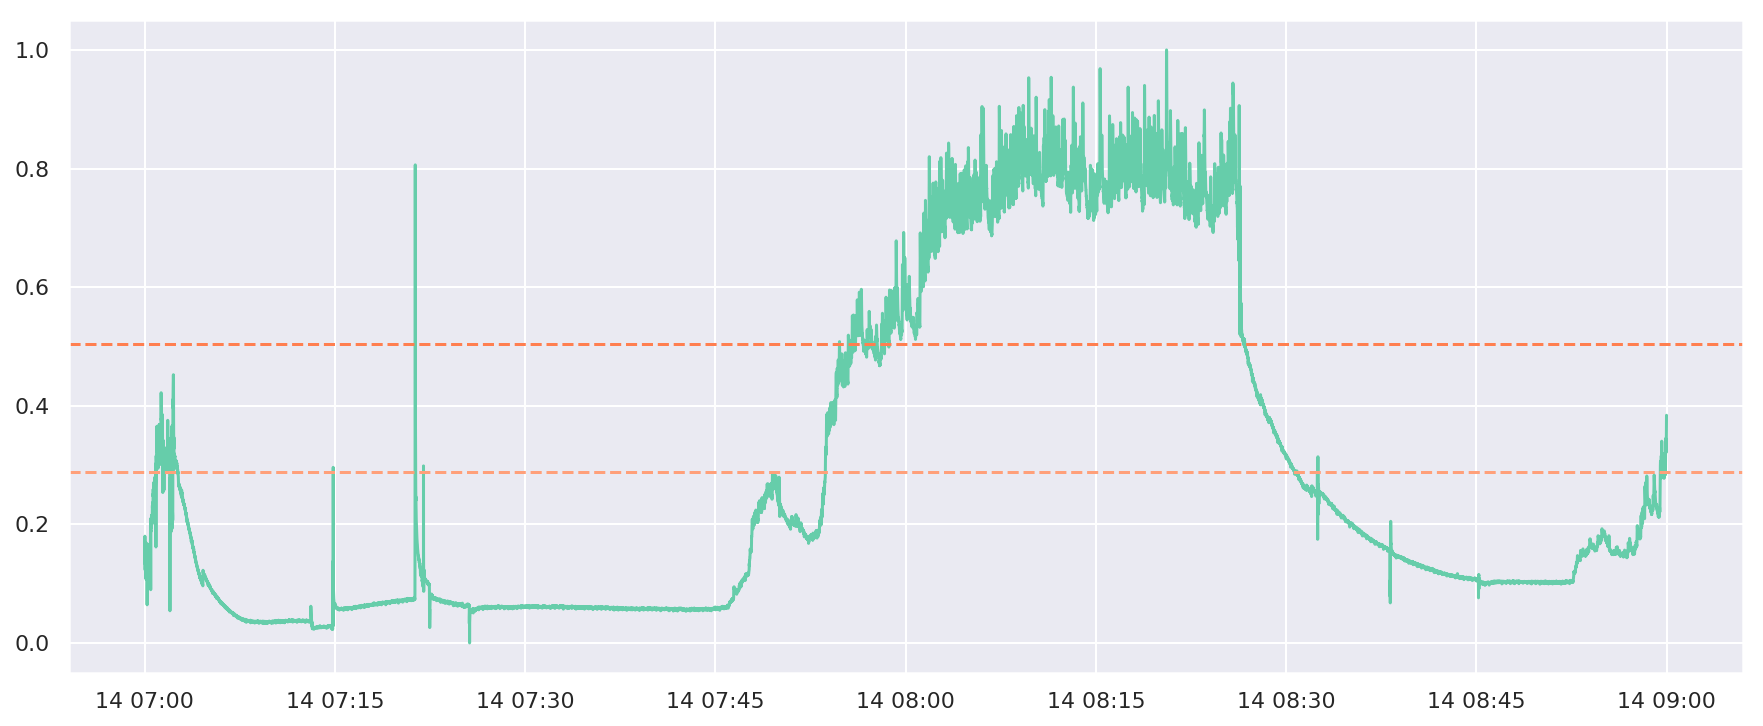

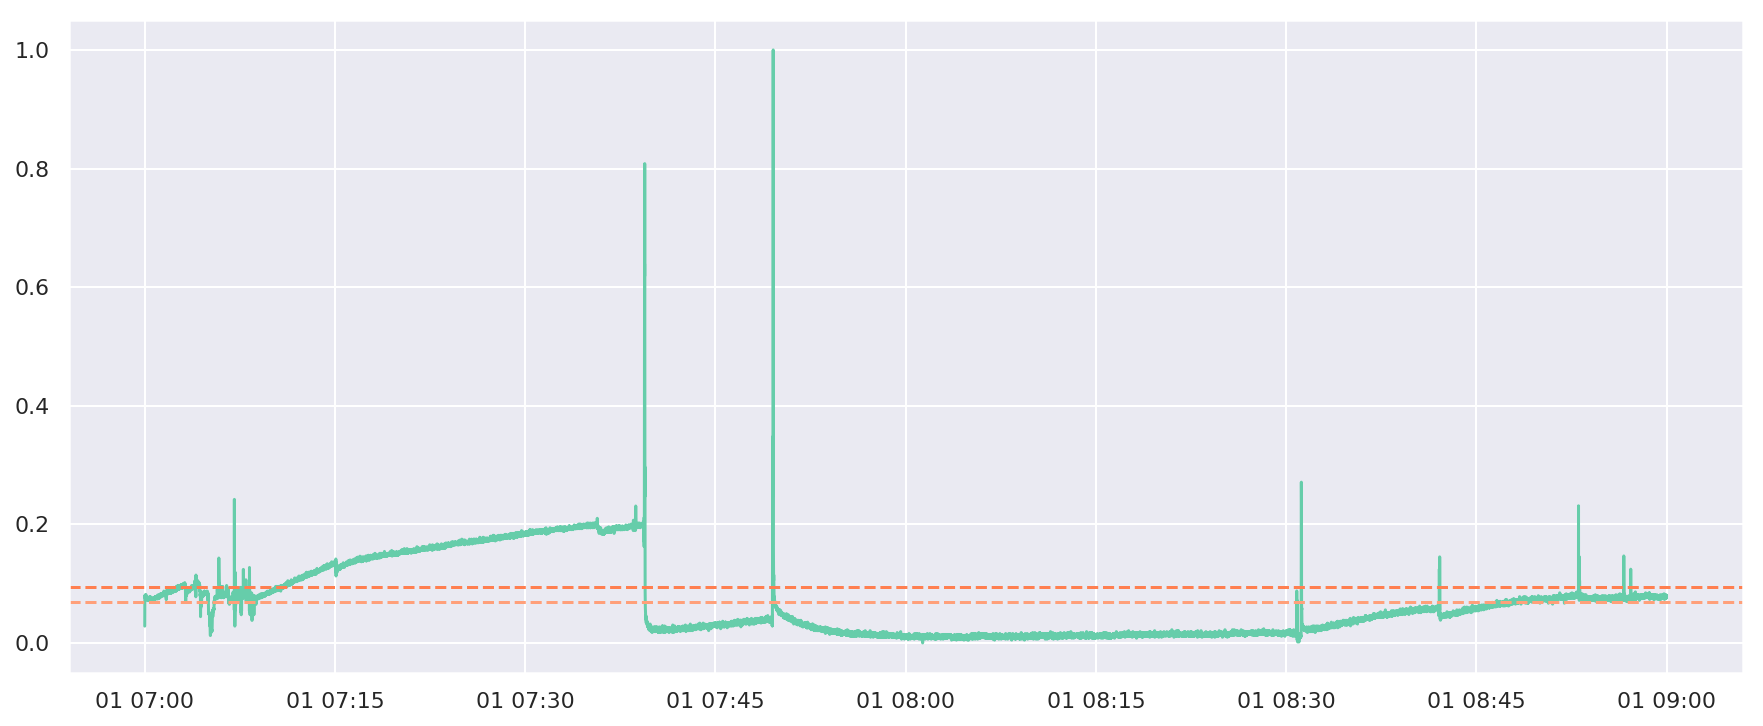

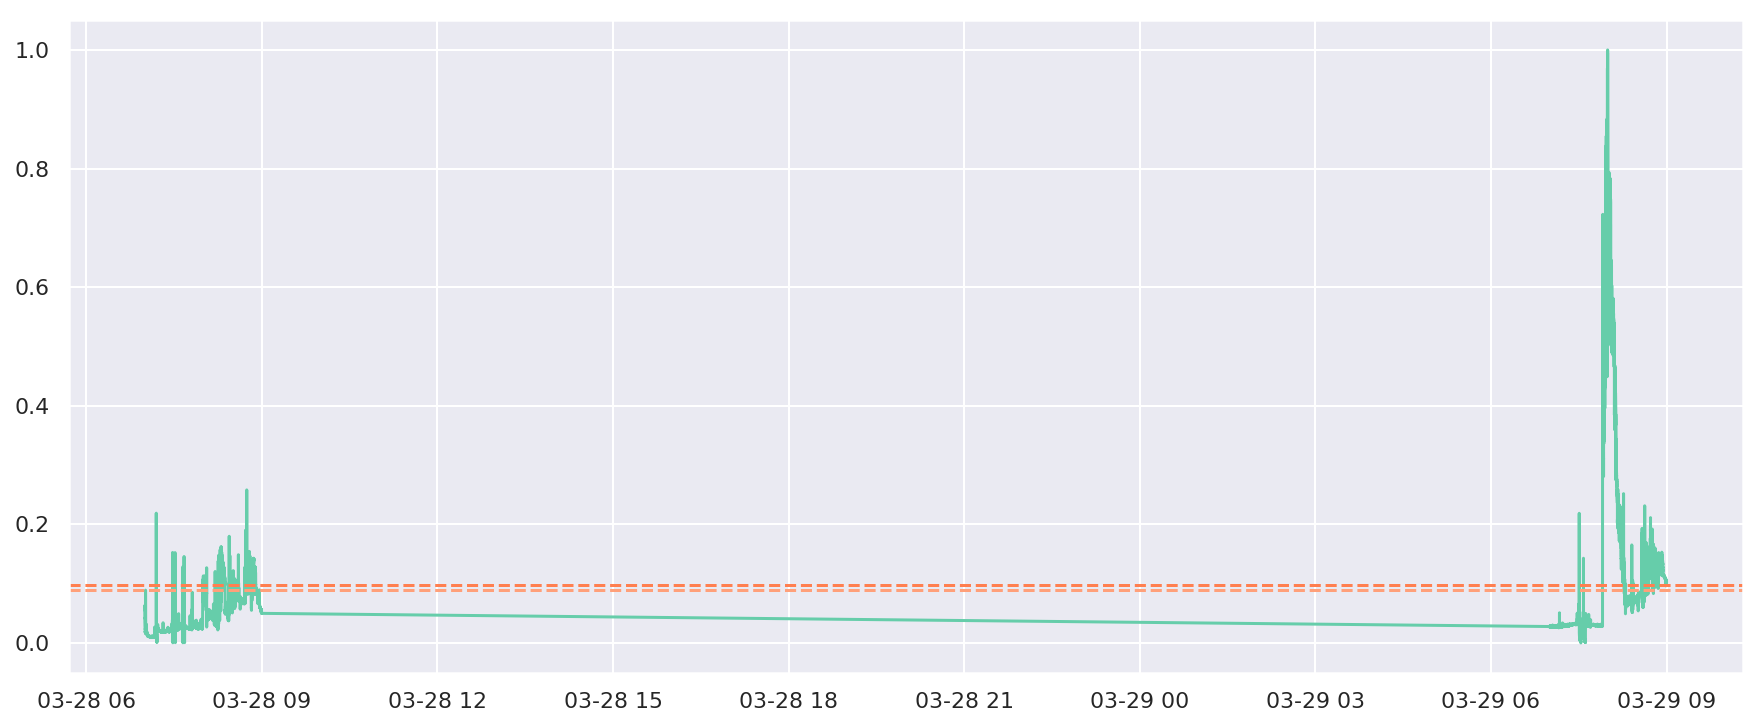

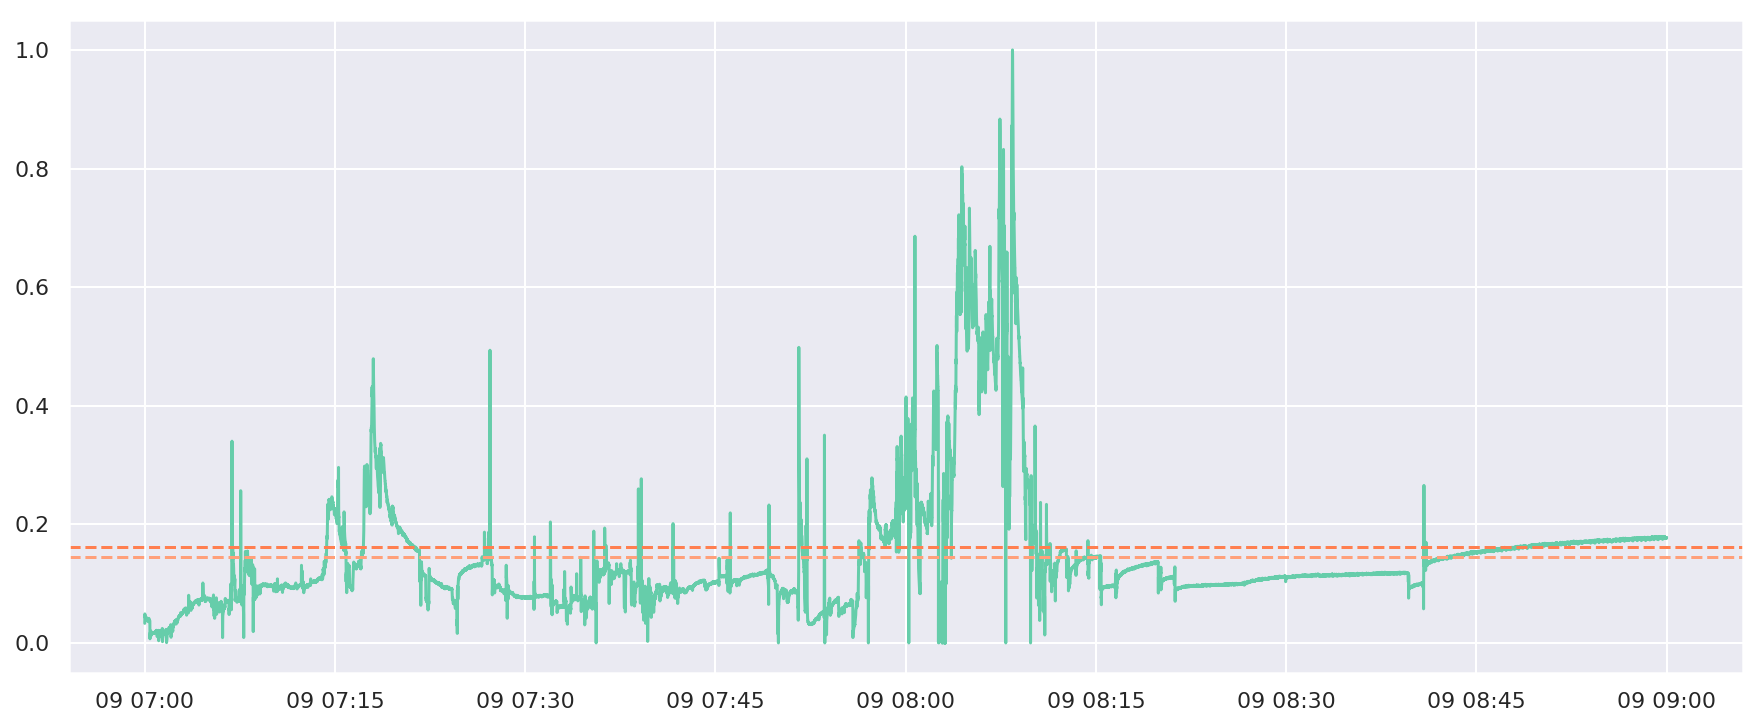

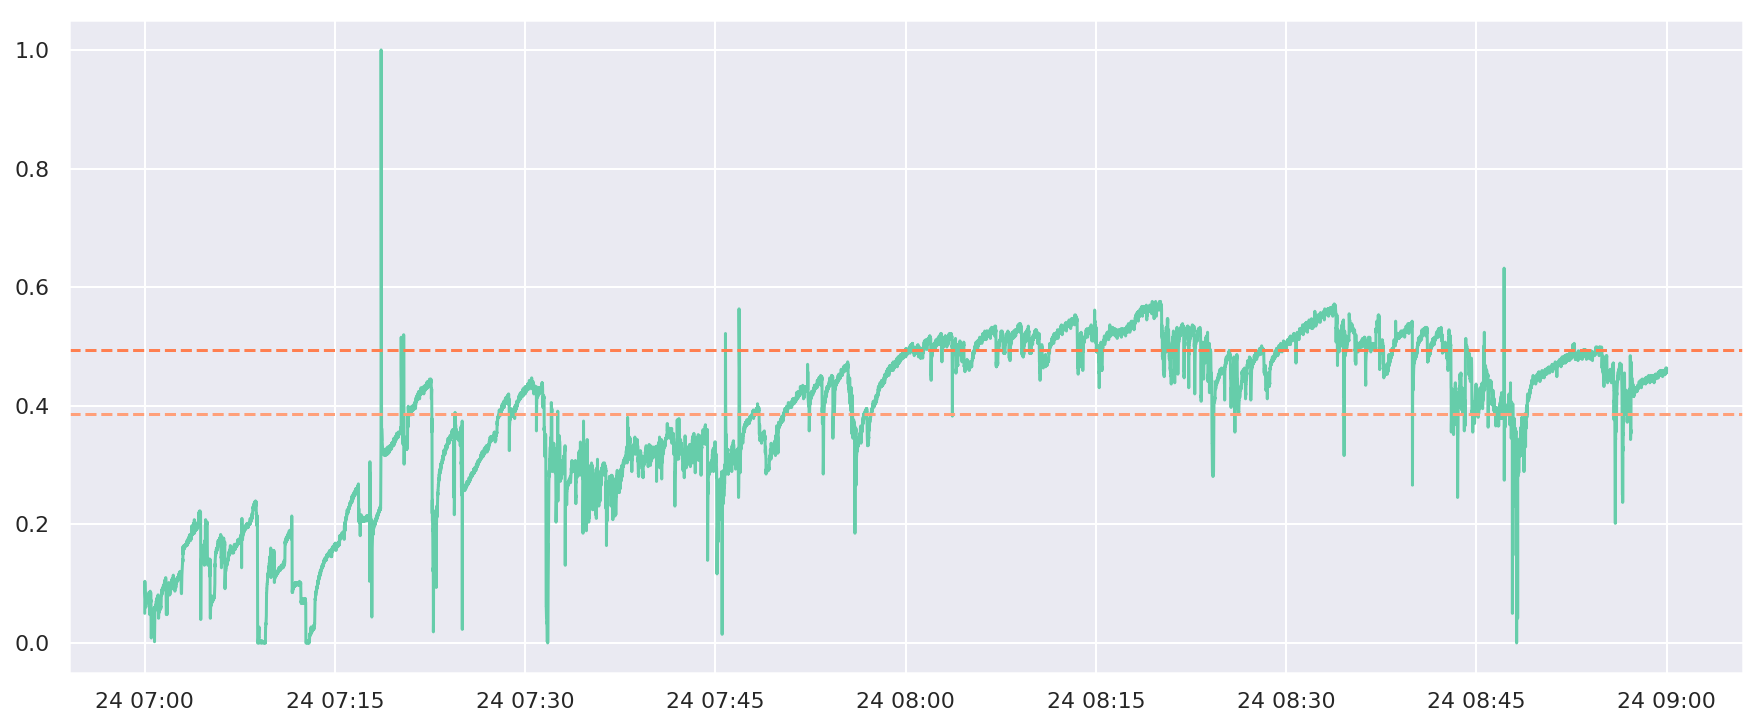

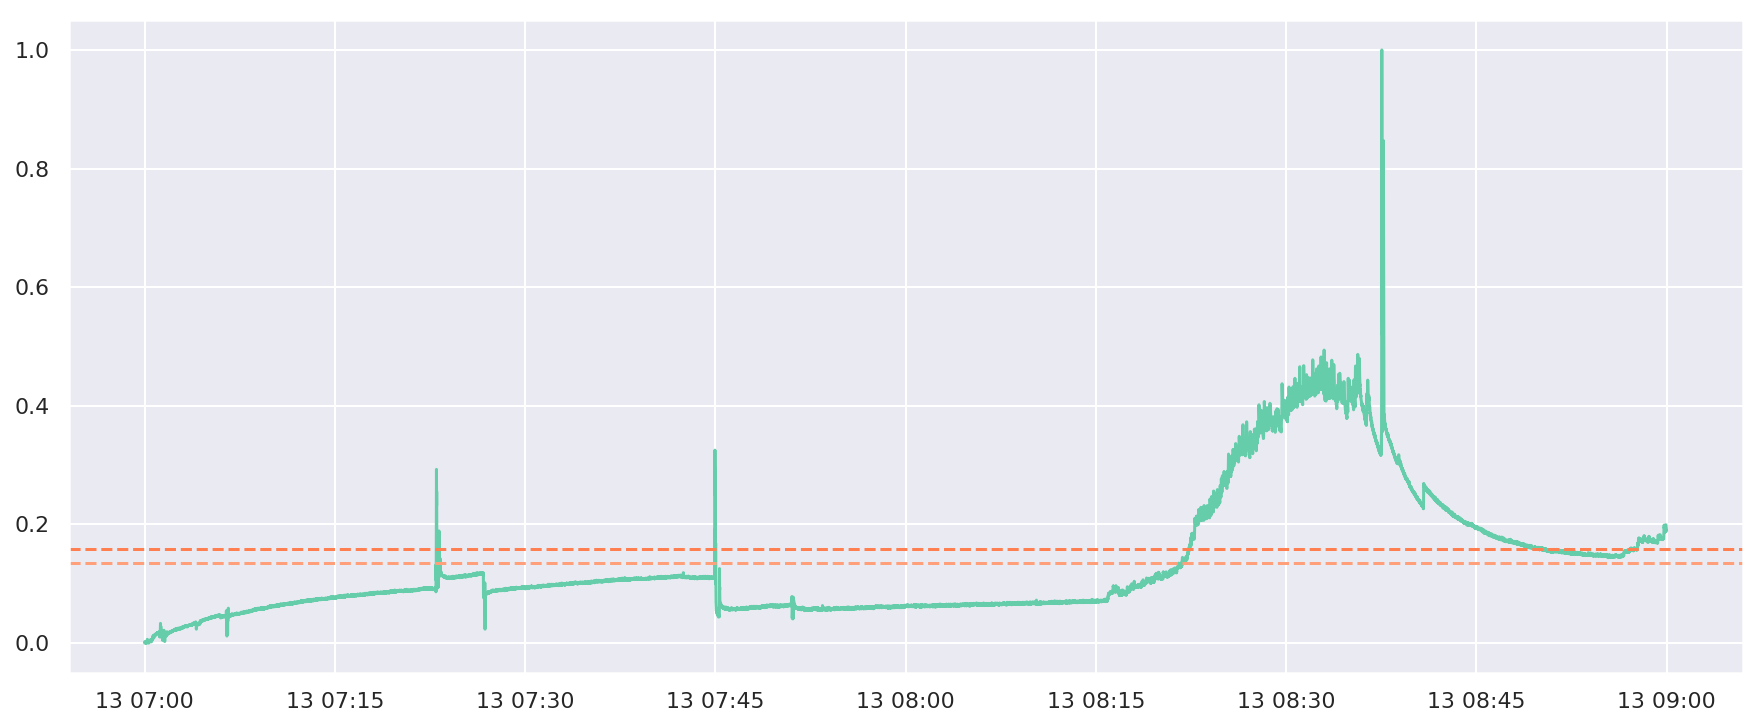

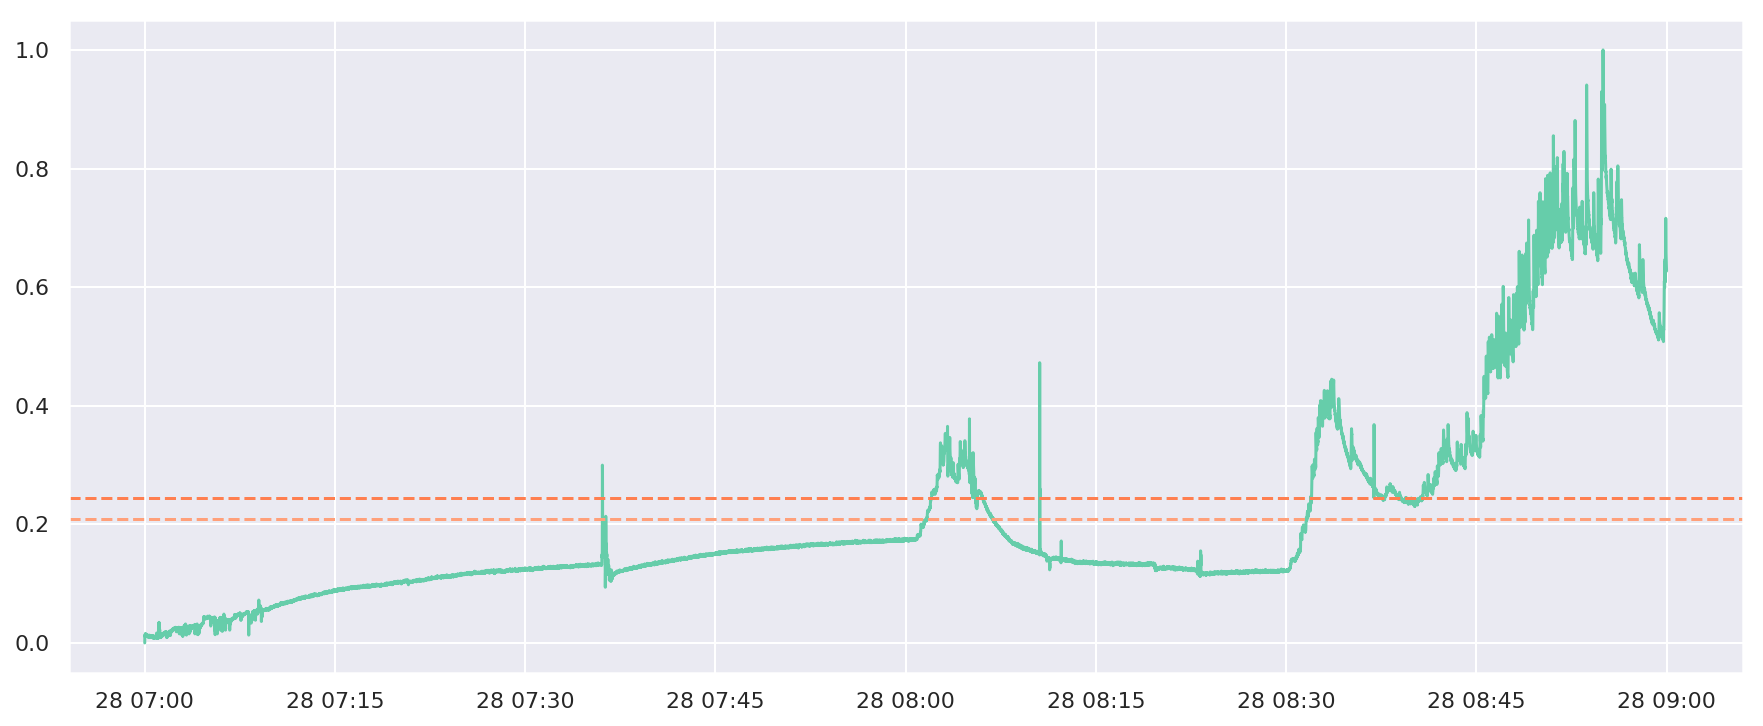

In [7]:

(df1_1,count1_1,mean1_1,max_scr1_1),(df1_2,count1_2,mean1_2,max_scr1_2),(df1_3,count1_3,mean1_3,max_scr1_3),\
(df1_4,count1_4,mean1_4,max_scr1_4),(df1_5,count1_5,mean1_5,max_scr1_5),\
(df1_6,count1_6,mean1_6,max_scr1_6) = [import_data(filepath,0.75) 
                                                    for filepath in file_names(path1)]
(df2_1,count2_1,mean2_1,max_scr2_1),(df2_2,count2_2,mean2_2,max_scr2_2),(df2_3,count2_3,mean2_3,max_scr2_3),\
(df2_4,count2_4,mean2_4,max_scr2_4),(df2_5,count2_5,mean2_5,max_scr2_5), \
(df2_6,count2_6,mean2_6,max_scr2_6) = [import_data(filepath,0.75) 
                                                    for filepath in file_names(path2)]

df1_1.head()

In [8]:
quan1_4

[7171]

In [ ]:
fl_eda_7 = pd.read_csv('../data/day_7/EDA.csv' , header= None)
fl_eda_7.columns  = ['eda']
fl_eda_freq_7 = fl_eda_7.iloc[1].values
print(len(fl_eda_7))
print('freq: ', fl_eda_freq_7)
fl_eda_7.head(10)

In [ ]:
# fl_init_time_7 = datetime.datetime.fromtimestamp(fl_eda_7.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_7 = datetime.datetime(2018, 4, 16, 7, 0,0).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_7

In [ ]:
fl_time_eda_7 = pd.date_range(start=fl_init_time_7, periods=len(fl_eda_7), 
                              freq=str(1/int(fl_eda_freq_7))+'S')
fl_time_eda_7

In [ ]:
fl_eda_7 = fl_eda_7.set_index(fl_time_eda_7, drop =True)
fl_eda_7 = fl_eda_7[3:]
# fl_eda_7= pd.date_range('07:00:00', '09:00:00')
fl_eda_7 = fl_eda_7.dropna()
print(len(fl_eda_7))
fl_eda_7.head()

# Normalize the data

In [ ]:
fl_eda_7['eda_norm'] = (fl_eda_7.eda - fl_eda_7.eda.min()) / (fl_eda_7.eda.max() - fl_eda_7.eda.min())
fl_eda_7.head()
 

## Count the frequency above 75% quantile

In [ ]:
eda_75 = np.mean(fl_eda_7.eda_norm.quantile(0.75))
sum(i > eda_75 for i in fl_eda_7.eda_norm)

In [ ]:
# plt.axvline(x = '2018-07-03 15:20:50.000',color = 'mediumaquamarine',linestyle='--')
plt.figure(figsize=(15,6))
plt.plot(fl_eda_7['eda_norm'],color ='mediumaquamarine')

# for (idx,data_point, presence, label) in tags_7.itertuples():
# #     print(data_point)
#     plt.axvline(x=data_point,color = 'lightsalmon', linestyle='--')
#     plt.text(data_point,0.05, s=label, horizontalalignment='center', verticalalignment='center',
#             fontsize=15)
# # # plt.axvline(x = tags_2.tagged_time[5],color = 'c',linestyle='--')
# plt.figtext(.5,.9,'Day 7 Social presence and stress response of cold shower - EDA ',
#             fontsize=20, ha='center')
# plt.legend(['EDA_day3'],loc=2,fontsize='medium')


print(eda_mean)
plt.axhline(y = eda_mean, color = 'lightsalmon', linestyle = '--')
# plt.savefig('black-eda.png', transparent=True)

plt.show()